Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from google.colab import drive
from zipfile import ZipFile
import zipfile
from tensorflow import keras
import tensorflow_datasets as tfds
#import splitfolders
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from keras import applications
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.applications.imagenet_utils import preprocess_input
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import KFold

Data loading

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


filtering test and train pictures

In [5]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/tomato_data/test"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)

        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

Train data

In [4]:
IMG_SHAPE  = 224
batch_size = 64


train_data = ImageDataGenerator(rescale = 1./255)
train_data = train_data.flow_from_directory(
directory = '/content/drive/MyDrive/tomato_data/train' ,batch_size = batch_size,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'categorical')
target_train = train_data.labels

Found 7700 images belonging to 3 classes.


Test Data

In [5]:
IMG_SHAPE  = 224
batch_size = 64
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES= True

test_data = ImageDataGenerator(rescale = 1./255)
test_data = test_data.flow_from_directory(
directory = '/content/drive/MyDrive/tomato_data/test' ,batch_size = batch_size,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'categorical')

Found 1991 images belonging to 3 classes.


Vgg model 

In [8]:
import torch
from torch.package import PackageImporter, PackageExporter

pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, 
                                                weights="imagenet")

for layer in pre_trained_model.layers:
# print(layer.name)
  layer.trainable = False

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)


model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
vgg_classifier = model.fit(train_data, validation_data=(test_data) ,validation_split=0.2,
                           epochs=5,
                           batch_size = batch_size)

#model_save_name = 'ai vgg model'
#path = F"/content/drive/MyDrive/ai vgg model" 
#torch.save(model.state_dict(), path)
 

Epoch 1/5
121/121 [==============================] - 4651s 38s/step - loss: 0.5585 - acc: 0.7758 - val_loss: 0.2619 - val_acc: 0.9141
Epoch 2/5
121/121 [==============================] - 4585s 38s/step - loss: 0.2783 - acc: 0.8988 - val_loss: 0.2025 - val_acc: 0.9297
Epoch 3/5
121/121 [==============================] - 4701s 39s/step - loss: 0.2107 - acc: 0.9208 - val_loss: 0.1685 - val_acc: 0.9387
Epoch 4/5
121/121 [==============================] - 4749s 39s/step - loss: 0.1740 - acc: 0.9360 - val_loss: 0.1650 - val_acc: 0.9417
Epoch 5/5
121/121 [==============================] - 4676s 39s/step - loss: 0.1581 - acc: 0.9442 - val_loss: 0.1641 - val_acc: 0.9402


summary

In [9]:
import tensorflow as tf
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, 
                                                weights="imagenet")

for layer in pre_trained_model.layers:
# print(layer.name)
  layer.trainable = False

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input, x)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

training vs validation curve

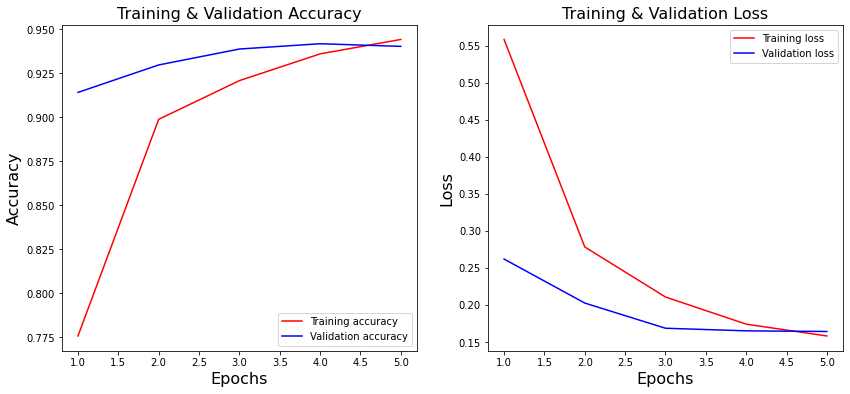

In [10]:
history_dict = vgg_classifier.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [ ]:
from keras.utils import to_categorical


X_train = np.array(train_data)
X_test = np.array(test_data)
y_train = np.array(train_data)
y_test = np.array(test_data)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255



print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

In [1]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.argmax(y_pred , axis= 1)

print(y_pred)
print(y_test)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix= conf_mat, display_labels=["bacterial_spot", "healthy", "target_spot"])
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()

ValueError: ignored

cross validation code

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)  
i = kfold.split(train_data, target_train)

kfold = KFold(n_splits=5, shuffle=True)                      
acc_per_fold = []
loss_per_fold = []


fold_no = 1
for train , test in kfold.split(train_data, target_train):
  vgg_classifier = model.fit(inputs[train], targets[train], 
                              epochs = 5,
                              batch_size = batch_size)
  model_save_name = f'ai vgg model {fold_no}'
  path = F"/content/drive/MyDrive/ai vgg model" 
  torch.save(model.state_dict(), path)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1